# Let's get to work

Here we're implementing linear regression.
Let's first discuss how it works.

# Linear Regression

Linear regression is a supervised learning algorithm, which means that we have a set of data points $(x_i, y_i)$, where $x_i$ is the input and $y_i$ is the output. We have a set of such data points, and we want to learn a function $f(x)$ which approximates $y_i$ as well as possible, for any $x$.

To do this, we start with a hypothesis function, which is a function of the form $h(x) = ax + b$, where $a$ and $b$ are parameters of the function. We want to find the values of $a$ and $b$ which give us the best approximation of $y_i$.

To do this, we define an error function, which is the sum of the squares of the differences between the actual output $y_i$ and the output of the hypothesis function $h(x)$. The error function is $E(a, b) = \sum_{i=1}^n (y_i - h(x_i))^2$.

We want to find the values of $a$ and $b$ which minimize this error function. To do this, we take the partial derivatives of the error function with respect to $a$ and $b$, and set them to zero. This gives us the following equations:
$$
\frac{\partial E}{\partial a} = -2\sum_{i=1}^n (y_i - h(x_i))x_i = 0
$$
$$
\frac{\partial E}{\partial b} = -2\sum_{i=1}^n (y_i - h(x_i)) = 0
$$

Solving these equations gives us the following:
$$
a = \frac{\sum_{i=1}^n x_iy_i - \frac{1}{n}\sum_{i=1}^n x_i\sum_{i=1}^n y_i}{\sum_{i=1}^n x_i^2 - \frac{1}{n}\left(\sum_{i=1}^n x_i\right)^2}
$$
$$
b = \frac{1}{n}\sum_{i=1}^n y_i - a\frac{1}{n}\sum_{i=1}^n x_i
$$

We can now use these values of $a$ and $b$ to get our hypothesis function, and use it to approximate the output for any input $x$.

We call this solution the closed form solution, because we can find the values of $a$ and $b$ without having to iterate over the data points.


# Implementation - closed form

In [1]:
# We have a dataset of 2D points, and we want to fit a line to it.
# We will use the normal equation formulas to find the line that minimizes the squared error.

# First, importing the libraries we need
import numpy as np
import matplotlib.pyplot as plt


In [36]:
# We will use the following function to plot the data and the line
def plotDataAndLine(X, y, theta):
    plt.plot(X, y, 'ro', markersize=2)
    plt.plot(X, np.dot(np.column_stack((np.ones((X.shape[0], 1)), X)), theta), '-')
    plt.show()



In [24]:
# Using a function to generate the data
def generateData(numPoints):
    X = np.array([i for i in range(numPoints)])
    y = np.linspace(0, 100, num=numPoints) + np.random.normal(0, 10, numPoints)
    return X, y


In [46]:
# Function to calculate closed form of theta
def normalEq(X,y):
    a = (np.sum(np.multiply(X,y)) - (np.sum(X) * np.sum(y)) / X.size) / (np.sum(np.multiply(X,X)) - np.sum(X)**2 / X.size)
    b = np.sum(y) / y.size - a * np.sum(X) / X.size
    return np.array([a,b])

[ 1.0086195  -1.19780138]


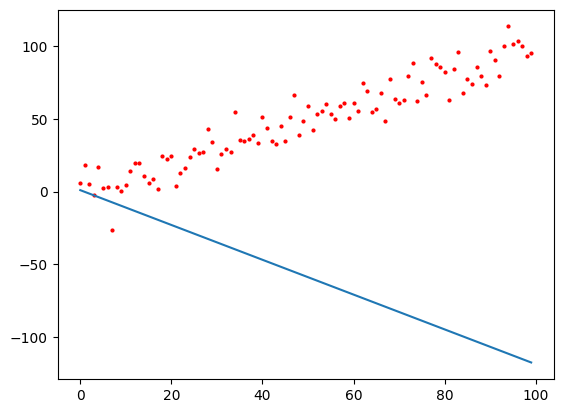

In [54]:
# Getting the data and plotting it
X, y = generateData(100)
theta = normalEq(X,y)
print(theta)
plotDataAndLine(X,y,theta)